# matplotlibGraphing.ipynb

Author: jchuah@tacc.utexas.edu

### Summary

Example of how to graph logged messages using matplotlib from an ev3 swarm in IPython

finished connection


<IPython.core.display.Javascript object>


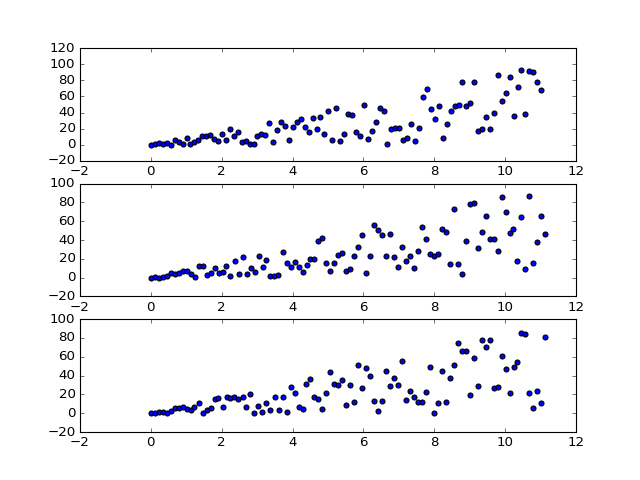

Broadcasting task
hostnames ['192.168.43.68', '192.168.43.149', '192.168.43.26']
Connecting to host 192.168.43.68
Connecting to host 192.168.43.149
Connecting to host 192.168.43.26
Ev3 Host connection on 192.168.43.68
Ev3 Host connection on 192.168.43.149
Ev3 Host connection on 192.168.43.26
Sending control message: run
{'192.168.43.149': 100, '192.168.43.26': 100, '192.168.43.68': 100}Starting connection



In [6]:
%matplotlib notebook

from ev3swarm import Swarm
import matplotlib.pyplot as Plot
import time

# This bot task just creates random numbers
def task(bot):
    # We have to have imports for everything we use in the task!
    import time
    import random
    for n in range(0, 100):
        val = random.random() * n
        # Log the message to the message queue
        bot.log(val)
        time.sleep(0.1)

# Make a list of hosts        
hosts = ["192.168.43.68", "192.168.43.149", "192.168.43.26"]

# Create a swarm connection with the RabbitMQ message broker's IP address
s = Swarm("192.168.43.106")

# Create one subplot per host
figure, subplots = Plot.subplots(len(hosts), 1)

# Show the whole figure before we begin graphing
figure.canvas.draw()

# Connect to all the hosts
s.connect(hosts)

# Give time for each host to connect
time.sleep(2)

# Load the task on each host
s.load_task(task)

# Wait for that to finish
time.sleep(2)

# Trigger the swarm
s.go()

# Update the graph 100 times
for n in range(0, 100):
    # Get everything that's currently in the swarm's message queue
    while not s.queue.empty():
        # Get a record from the logging queue
        # The record is a dictionary with fields "host", "time" and "obj"
        # "obj" is the data value
        record = s.queue.get()
        histogram[record["host"]] = current
        if len(hosts) > 1:
            # There's multiple subplots, find the subplot matching the host
            subplots[hosts.index(record["host"])].scatter(record["time"], record["obj"])
        else:
            # There's one subplot, so ignore the "host" field in the record
            subplots.scatter(record["time"], record["obj"])
            
    # Refresh the entire graph
    figure.canvas.draw()
    # Wait a little bit. If you wait too long, the queue will fill up and you will miss messages
    time.sleep(0.1)